### 기초

In [2]:
import cv2
import sys

print("Hello, OpenCV", cv2.__version__)

Hello, OpenCV 4.8.0


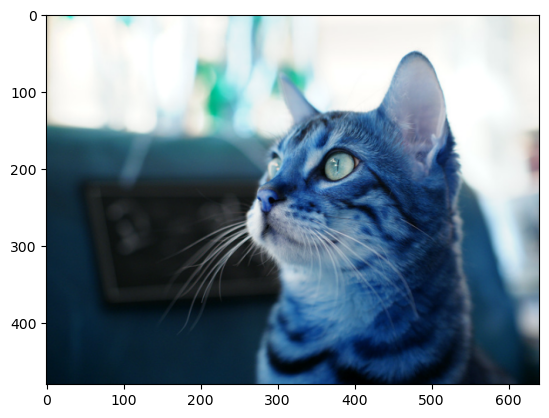

In [3]:
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat.bmp')
plt.imshow(img)
plt.show()

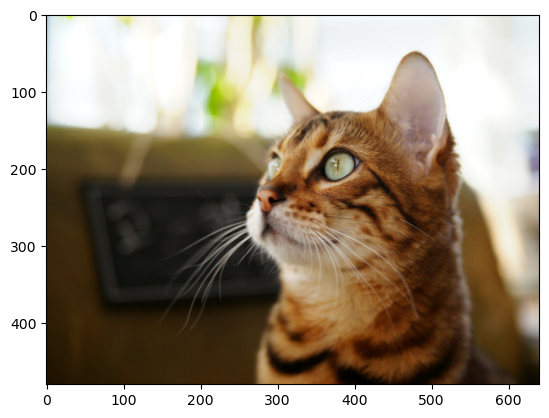

In [4]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

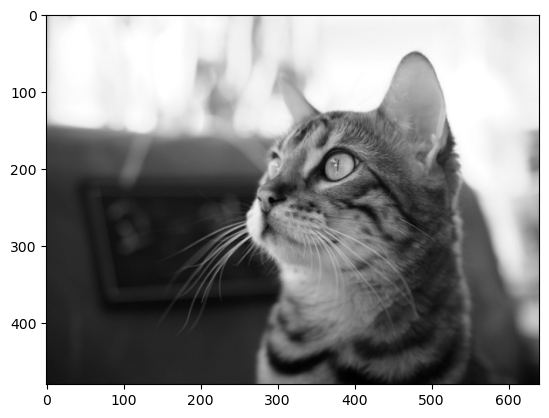

In [5]:
img = cv2.imread('./img/cat.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

if img is None:
    print('Image load failed!')
    sys.exit()

In [6]:
cv2.imwrite('cat_gray.png', img)

True

In [7]:
cv2.namedWindow('image')
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
cv2.namedWindow('image')
cv2.imshow('image', img)

while True:
    if cv2.waitKey() == ord('q'):
        break
    
cv2.destroyAllWindows()

### matplotlib

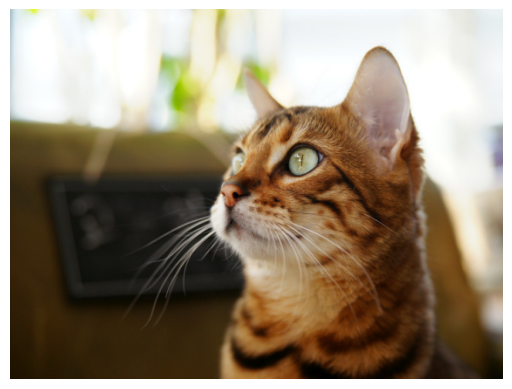

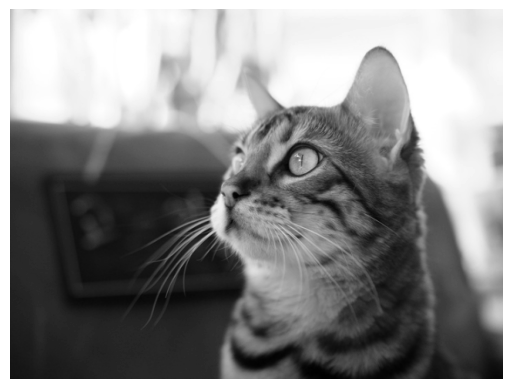

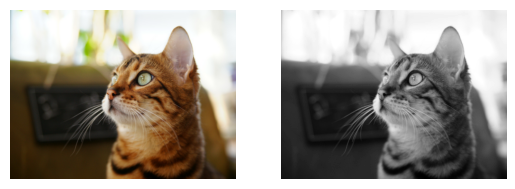

In [9]:
imgBGR = cv2.imread('./img/cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imgRGB)
plt.show()

# 그레이스케일 영상 출력
imgGray = cv2.imread('./img/cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray')
plt.show()

## 슬라이드 쇼

In [10]:
'''
폴더 이미지 파일 목록 일기
os.listdir()
glob.glob()
'''

'\n폴더 이미지 파일 목록 일기\nos.listdir()\nglob.glob()\n'

In [11]:
import sys
import glob
import cv2

# 이미지 파일을 모두 img_files 리스트에 추가
img_files = glob.glob('.\\images\\*.jpg')
if not img_files:
    print("There are no jpg files in 'images' folder")
    sys.exit() # 시스템 종료 명령어
    
img_files

['.\\images\\autumn_forest_park_128379_1920x1080.jpg',
 '.\\images\\boat_mountains_lake_135258_1920x1080.jpg',
 '.\\images\\forest_fog_trees_128751_1920x1080.jpg',
 '.\\images\\pier_dock_sea_dusk_shore_118549_1920x1080.jpg',
 '.\\images\\road_marking_evening_clouds_horizon_120298_1920x1080.jpg']

In [12]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cnt = len(img_files)
idx = 0

while True:
    img = cv2.imread(img_files[idx])
    
    if img is None:
        print('Image load failed!')
        break
    
    cv2.imshow('image', img)
    if cv2.waitKey(1000) >= 0:
        break
    
    idx += 1
    if idx >= cnt:
        idx = 0

cv2.destroyAllWindows()

### 영상처리

In [13]:
# 영상 : numpydml ndarray

img1 = cv2.imread('./img/cat.bmp', cv2.IMREAD_GRAYSCALE) #gray
img2 = cv2.imread('./img/cat.bmp', cv2.IMREAD_COLOR)#color 

if img1 is None or img2 is None:
    print('Image load failed!')
    sys.exit()
    
# 영상의 속성 참조
print('type(img1):', type(img1))
print('img1.shpe:', img1.shape)
print('img2.shpe:', img2.shape)
print('img1.dtype:', img1.dtype)

type(img1): <class 'numpy.ndarray'>
img1.shpe: (480, 640)
img2.shpe: (480, 640, 3)
img1.dtype: uint8


In [14]:
h, w = img2.shape[:2]
print('img2 size: {} x {}'.format(w, h))
if len(img1.shape) == 2:
    print('img1 is a grayscale image')
elif len(img1.shape) == 3:
    print('img1 is a truecolor image')
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey()
cv2.destroyAllWindows()

img2 size: 640 x 480
img1 is a grayscale image


In [15]:
h, w = img2.shape[:2]
for x in range(w):
    img2[50, x] = (0, 0, 255)
cv2.imshow('img2', img2)
cv2.waitKey()

cv2.destroyAllWindows()

## 새 영상 생성

In [16]:
import numpy as np
import cv2
img1 = np.empty((240, 320), dtype=np.uint8)         # grayscale image
img2 = np.zeros((240, 320, 3), dtype=np.uint8)      # color image
img3 = np.ones((240, 320), dtype=np.uint8) * 255          # dark gray
img4 = np.full((240, 320, 3), (0, 255, 255), dtype=np.uint8) # yellow

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
img1[0,0], img2[0,0], img3[0,0], img4[0,0]

(112, array([0, 0, 0], dtype=uint8), 255, array([  0, 255, 255], dtype=uint8))

### 이미지 슬라이싱

In [18]:
import numpy as np
import cv2

img1 = cv2.imread('./video/HappyFish.jpg')

img2 = img1[40:120, 30:150]  #numpy.ndarray의 슬라이싱
img3 = img1[120:150, 30:150].copy()  # 복사

img2.fill(0) # 검정
img3.fill(0) # 검정

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()

## 마스크 영상을 이용한 영상 합성

In [19]:
import sys
import cv2

src = cv2.imread('./video/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./video/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./video/field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load failed!')
    sys.exit()
    
cv2.copyTo(src, mask, dst)    

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
src = cv2.imread('./img/cat.bmp', cv2.IMREAD_COLOR)

### 동영상 이펙트

In [21]:
import sys
import cv2
import numpy as np

# 두 개의 동영상을 열어서 cap1,cap2로 지정
cap1 = cv2.VideoCapture('./video/video1.mp4')
cap2 = cv2.VideoCapture('./video/video2.mp4')

if not cap1.isOpened() or not cap2.isOpened():
    print('Video open failed!')
    sys.exit()

In [22]:
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))

In [23]:
frame_cnt1, frame_cnt2

(85, 121)

In [24]:
# 영상 fps 확인
fps = cap1.get(cv2.CAP_PROP_FPS)
fps1 = cap2.get(cv2.CAP_PROP_FPS)

In [25]:
fps, fps1

(24.0, 24.0)

In [26]:
effect_frames = int(fps*2)
print('frame_cnt1:',frame_cnt1)
print('frame_cnt2:',frame_cnt2)
print('cap1 FPS:',fps)
print('cap2 FPS:',fps1)

frame_cnt1: 85
frame_cnt2: 121
cap1 FPS: 24.0
cap2 FPS: 24.0


In [27]:
# 두 프레임 사이의 시간 간격 
delay = int(1000 / fps)

In [28]:
w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
w, h

(1280, 720)

In [29]:
# 출력 동영상 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, fps, (w,h))

In [30]:
# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()
    
    if not ret1:
        print('frame read error!')
        sys.exit()
        
    out.write(frame1)
    
    cv2.imshow('output',frame1)
    cv2.waitKey(delay)

cv2.destroyAllWindows()

In [32]:
# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    
    if not ret1 or not ret2:
        print('frmae read error!')
        sys.exit()

frmae read error!


SystemExit: 

C:\Users\LEEBYC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
